In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import geopandas
import plot_utils
import mpl_toolkits
import matplotlib
import math

In [2]:
ld = pd.read_csv("Csci343Project2Orangeout.tab", sep='\t')
od = pd.read_csv("RealEstate_Georgia.csv")
print(ld.head())

  is_bankOwned=0 is_bankOwned=1 lotAreaUnits=Acres lotAreaUnits=sqft  \
0     continuous     continuous         continuous        continuous   
1            NaN            NaN                NaN               NaN   
2            1.0            0.0                1.0               0.0   
3            1.0            0.0                1.0               0.0   
4            1.0            0.0                1.0               0.0   

             yearBuilt              zipcode            longitude  \
0           continuous           continuous           continuous   
1                  NaN                  NaN                  NaN   
2   0.2012201220122012   0.8484530676455165  0.45906282360983686   
3  0.20072007200720074  0.16885159937073937   0.2561880084044061   
4  0.19851985198519853  0.04299947561615102   0.2894029695145049   

              latitude      pool=0      pool=1  ... event=Pending sale  \
0           continuous  continuous  continuous  ...         continuous   
1         

In [3]:
ld[['price', 'Gradient Boosting']][2:]

,price,Gradient Boosting
2,799000.0,652214.8957835366
3,1495000.0,1394175.572581645
4,370100.0,386793.62544296146
5,169999.0,141345.00686444686
6,309990.0,345537.8618090215
...,...,...
8184,419900.0,508114.5115774345
8185,144900.0,183951.50483697906
8186,625000.0,621734.660291712
8187,199000.0,300552.9732748373


In [115]:
num = 0
for i in range(2, len(ld)):
#    if(abs(float(ld.loc[i]['price']) - float(ld.loc[i]['Gradient Boosting'])) > 300000):
    if(float(ld.loc[i]['price']) - float(ld.loc[i]['Gradient Boosting']) < -250000):    
        print(ld.loc[i]['streetAddress'] + ", delta: $%.2f, original: $%.2f" %( (float(ld.loc[i]['price']) - float(ld.loc[i]['Gradient Boosting'])), float(ld.loc[i]['price'])))
        print(ld.loc[i]['county'])
#         print(ld.loc[i])
#         print()
        num = num + 1
print()
print(num)

5266 Hopewell Church Rd, delta: $-252835.04, original: $1295000.00
Hall County
0 Jack St SE, delta: $-374435.47, original: $98000.00
Floyd County
230 Booth Rd SW, delta: $-297459.67, original: $75000.00
Cobb County
113 Samuel Lyon Way, delta: $-265571.59, original: $929000.00
Chatham County
707 Prestige Point, delta: $-269398.29, original: $1050000.00
Fayette County
610 Hillpine Dr NE, delta: $-271166.79, original: $3500.00
Fulton County
655 Coley Oaks Ct, delta: $-254759.69, original: $1300000.00
Fulton County
5109 Vernon Ridge Dr, delta: $-292012.11, original: $2700.00
Dekalb County
740 Moores Mill Rd NW, delta: $-292550.54, original: $695000.00
Fulton County
255 Helens Manor Dr, delta: $-344532.35, original: $629900.00
Gwinnett County
1219 Oakdale Rd NE, delta: $-373123.56, original: $975.00
Dekalb County
257 Bonds Lake Rd, delta: $-293598.97, original: $250000.00
Madison County
53 Dupree Rd, delta: $-252518.06, original: $425000.00
Paulding County
115 Newcastle Ct, delta: $-255714.

In [46]:
usMap = geopandas.read_file('cb_2018_us_county_20m/cb_2018_us_county_20m.shp')
georgiaMap = usMap[0:0]
count = 0
for i in range(len(usMap)):
    if usMap.loc[i]['STATEFP'] in ['13']:
        georgiaMap.loc[count] = (usMap.loc[i])
        count = count + 1
print(georgiaMap)

    STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID      NAME LSAD  \
0        13      081  00351607  0500000US13081  13081     Crisp   06   
1        13      043  00342852  0500000US13043  13043   Candler   06   
2        13      013  00356976  0500000US13013  13013    Barrow   06   
3        13      089  01687424  0500000US13089  13089    DeKalb   06   
4        13      073  00348865  0500000US13073  13073  Columbia   06   
..      ...      ...       ...             ...    ...       ...  ...   
154      13      223  00349912  0500000US13223  13223  Paulding   06   
155      13      039  01671316  0500000US13039  13039    Camden   06   
156      13      307  00352287  0500000US13307  13307   Webster   06   
157      13      157  00349570  0500000US13157  13157   Jackson   06   
158      13      261  00343504  0500000US13261  13261    Sumter   06   

          ALAND     AWATER                                           geometry  
0     706189044   21457002  POLYGON ((-83.96128 32.0305

    STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID      NAME LSAD  \
0        13      081  00351607  0500000US13081  13081     Crisp   06   
1        13      043  00342852  0500000US13043  13043   Candler   06   
2        13      013  00356976  0500000US13013  13013    Barrow   06   
3        13      089  01687424  0500000US13089  13089    DeKalb   06   
4        13      073  00348865  0500000US13073  13073  Columbia   06   
..      ...      ...       ...             ...    ...       ...  ...   
154      13      223  00349912  0500000US13223  13223  Paulding   06   
155      13      039  01671316  0500000US13039  13039    Camden   06   
156      13      307  00352287  0500000US13307  13307   Webster   06   
157      13      157  00349570  0500000US13157  13157   Jackson   06   
158      13      261  00343504  0500000US13261  13261    Sumter   06   

          ALAND     AWATER                                           geometry  
0     706189044   21457002  POLYGON ((-83.96128 32.0305

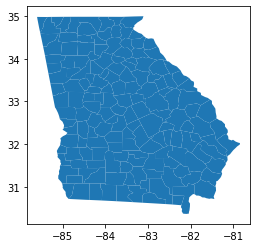

In [47]:
georgiaMap.plot()
print(georgiaMap)

In [6]:
print(od)

     datePostedString  is_bankOwned  is_forAuction            event   price  \
0              7/9/20             0              0  Listed for sale  399000   
1            10/14/20             0              0     Price change  299900   
2            10/16/20             0              0  Listed for sale  170000   
3             4/17/21             0              0  Listed for sale  319000   
4             5/20/21             0              0     Price change  287000   
...               ...           ...            ...              ...     ...   
8182           7/1/21             0              0  Listed for sale   30000   
8183           7/1/21             0              0  Listed for sale  194000   
8184           7/8/21             0              0  Listed for sale  499900   
8185          7/13/21             0              0  Listed for sale  184900   
8186          7/13/21             0              0  Listed for sale  200000   

      pricePerSquareFoot       city  yearBuilt     

In [94]:
countyToFPDict = {}
counties = ["APPLING","ATKINSON","BACON","BAKER","BALDWIN","BANKS","BARROW","BARTOW","BEN HILL","BERRIEN","BIBB","BLECKLEY","BRANTLEY","BROOKS","BRYAN","BULLOCH","BURKE","BUTTS","CALHOUN","CAMDEN","skip","CANDLER","CARROLL","CATOOSA","CHARLTON","CHATHAM","CHATTAHOOCHEE","CHATTOOGA","CHEROKEE","CLARKE","CLAY","CLAYTON","CLINCH","COBB","COFFEE","COLQUITT","COLUMBIA","COOK","COWETA","CRAWFORD","CRISP","DADE","DAWSON","DECATUR","DEKALB","DODGE","DOOLY","DOUGHERTY","DOUGLAS","EARLY","ECHOLS","EFFINGHAM","ELBERT","EMANUEL","EVANS","FANNIN","FAYETTE","FLOYD","FORSYTH","FRANKLIN","FULTON","GILMER","GLASCOCK","GLYNN","GORDON","GRADY","GREENE","GWINNETT","HABERSHAM","HALL","HANCOCK","HARALSON","HARRIS","HART","HEARD","HENRY","HOUSTON","IRWIN","JACKSON","JASPER","JEFF DAVIS","JEFFERSON","JENKINS","JOHNSON","JONES","LAMAR","LANIER","LAURENS","LEE","LIBERTY","LINCOLN","LONG","LOWNDES","LUMPKIN","MACON","MADISON","MARION","MCDUFFIE","MCINTOSH","MERIWETHER","MILLER","skip","MITCHELL","MONROE","MONTGOMERY","MORGAN","MURRAY","MUSCOGEE","NEWTON","OCONEE","OGLETHORPE","PAULDING","PEACH","PICKENS","PIERCE","PIKE","POLK","PULASKI","PUTNAM","QUITMAN","RABUN","RANDOLPH","RICHMOND","ROCKDALE","SCHLEY","SCREVEN","SEMINOLE","SPALDING","STEPHENS","STEWART","SUMTER","TALBOT","TALIAFERRO","TATTNALL","TAYLOR","TELFAIR","TERRELL","THOMAS","TIFT","TOOMBS","TOWNS","TREUTLEN","TROUP","TURNER","TWIGGS","UNION","UPSON","WALKER","WALTON","WARE","WARREN","WASHINGTON","WAYNE","WEBSTER","WHEELER","WHITE","WHITFIELD","WILCOX","WILKES","WILKINSON","WORTH"]
for i in range(len(counties)):
    counties[i] = counties[i][:1] + counties[i][1:].lower() + " County"
counties[8] = "Ben Hill County"
counties[80] = "Jeff Davis County"
counties[97] = "McDuffie County"
counties[98] = "McIntosh County"

for i in range(len(counties)):
    countyToFPDict.update({ counties[i] : '{:0>3}'.format((i*2)+ 1)})
print(countyToFPDict)

#for each row in the csv, find the FP # for the county.
#Using that, find the row in the georgiaMap (first using a list), then update or create the price of the row there
#once list is completed, append it to the map, then plot using price

mapProfit = [0]*len(georgiaMap)
avgMapProfit = [0]*len(georgiaMap)
avgmapProfitCount = [0]*len(georgiaMap)

for i in range(len(od)):
    countyName = od.loc[i]['county']
    countyNumber = countyToFPDict[countyName]
    index = np.where(georgiaMap['COUNTYFP'] == countyNumber)[0][0]
    mapProfit[index] = mapProfit[index] + od.loc[i]['price']
    avgmapProfitCount[index] += 1
for i in range(len(mapProfit)):
    if(avgmapProfitCount[i] != 0):
        avgMapProfit[i] = mapProfit[i]/avgmapProfitCount[i]
georgiaMap['price'] = mapProfit
georgiaMap['avgprice'] = avgMapProfit
#     index = georgiaMap['COUNTYFP'].index
# print(np.where(georgiaMap['COUNTYFP'] == '001')[0][0]) #where returns a 2d array, [0][0] acces first value which is index
# print(georgiaMap.loc[82])

{'Appling County': '001', 'Atkinson County': '003', 'Bacon County': '005', 'Baker County': '007', 'Baldwin County': '009', 'Banks County': '011', 'Barrow County': '013', 'Bartow County': '015', 'Ben Hill County': '017', 'Berrien County': '019', 'Bibb County': '021', 'Bleckley County': '023', 'Brantley County': '025', 'Brooks County': '027', 'Bryan County': '029', 'Bulloch County': '031', 'Burke County': '033', 'Butts County': '035', 'Calhoun County': '037', 'Camden County': '039', 'skip County': '203', 'Candler County': '043', 'Carroll County': '045', 'Catoosa County': '047', 'Charlton County': '049', 'Chatham County': '051', 'Chattahoochee County': '053', 'Chattooga County': '055', 'Cherokee County': '057', 'Clarke County': '059', 'Clay County': '061', 'Clayton County': '063', 'Clinch County': '065', 'Cobb County': '067', 'Coffee County': '069', 'Colquitt County': '071', 'Columbia County': '073', 'Cook County': '075', 'Coweta County': '077', 'Crawford County': '079', 'Crisp County': '

<AxesSubplot:>

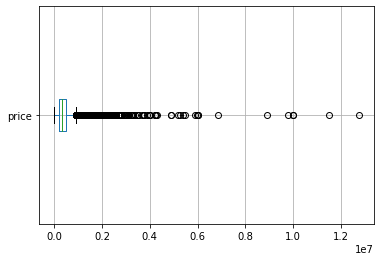

In [20]:
od.boxplot(column = 'price', vert = False)

<AxesSubplot:>

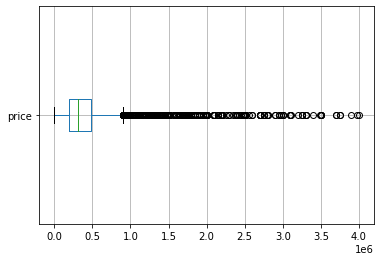

In [27]:
od[od['price'] < 4000000].boxplot(column = 'price', vert = False)

In [28]:
total = 0
count = 0
for i in range(len(od)):
    if(od.loc[i]['price'] < 4000000):
        total += od.loc[i]['price']
        count += 1
print("Total %.2f, count %f, average %.2f" % (total, count, (total/count)))

Total 3347113360.00, count 8165.000000, average 409934.28


<AxesSubplot:>

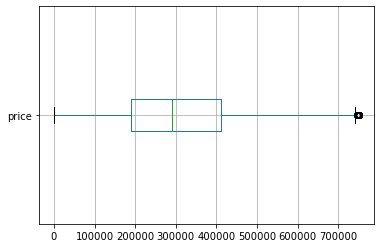

In [34]:
od[od['price'] < 750000].boxplot(column = 'price', vert = False)

<AxesSubplot:>

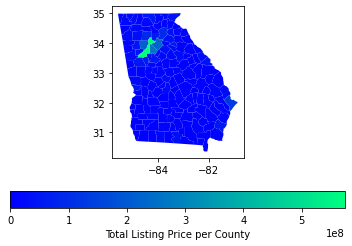

In [114]:
fig, ax = plt.subplots(1, 1)
georgiaMap.plot(column='price', figsize=(45,45), ax=ax, legend = True, cmap='winter', legend_kwds={'label': "Total Listing Price per County", 'orientation': "horizontal"}, )

<AxesSubplot:>

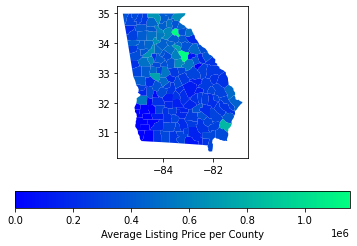

In [116]:
fig, ax = plt.subplots(1, 1)
georgiaMap.plot(column='avgprice', figsize=(45,45), ax=ax, legend = True, cmap='winter', legend_kwds={'label': "Average Listing Price per County", 'orientation': "horizontal"})

<AxesSubplot:xlabel='livingArea', ylabel='price'>

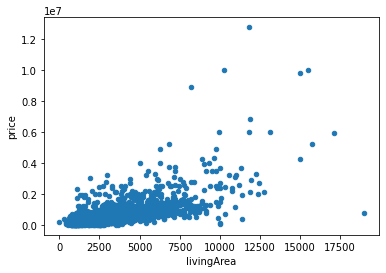

In [101]:
od[(od['livingArea'] > 0 ) & (od['livingArea'] < 20000)].plot(x = 'livingArea', y = 'price', kind = 'scatter')

<AxesSubplot:xlabel='pricePerSquareFoot', ylabel='price'>

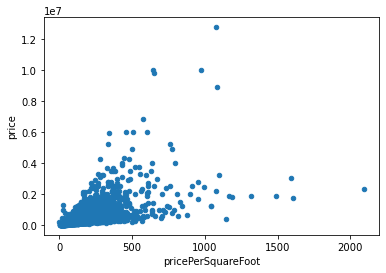

In [104]:
od[(od['pricePerSquareFoot'] > 0) & (od['pricePerSquareFoot'] < 50000)].plot(x = 'pricePerSquareFoot', y = 'price', kind = 'scatter')